<br><br><center><h1 style="font-size:2em;color:#2467C0">Tagesaufgaben
</h1></center>
<br>

In [3]:
import pandas as pd
import re

from jinja2.filters import ignore_case
from pywin.Demos.cmdserver import flags
from sqlalchemy import extract

Hilfreiche Webseiten zum Thema reguläre Ausdrücke (regex)
- [regex-Tester mit englischen Erklärungen - https://regex101.com/](https://regex101.com/)
- [Visueller regex-Tester (englisch) - https://www.debuggex.com/](https://www.debuggex.com/)
- [Deutsche Webseite mit regex-Tester - https://www.regexe.de/](https://www.regexe.de/)

- [Regex Quickstart - https://www.rexegg.com/regex-quickstart.html](https://www.rexegg.com/regex-quickstart.html)

## Aufgabe 1 - regex

 Im Folgenden haben wir den Datensatz ```fruechte``` . Mit regex (eng. regular expression - reguläre Ausdrücke) versuchen wir ein paar Muster zu finden.

In [4]:
fruechte = pd.DataFrame({"Name":["Bananen","Orangen", "MELONEN", "Birnen", "APfel"]})
fruechte

,Name
0,Bananen
1,Orangen
2,MELONEN
3,Birnen
4,APfel


**a)** Finde alle Wörter aus dem ```fruechte``` DataFrame, die _zuerst einen Großbuchstaben + danach einen Kleinbuchstaben_ haben und gebe ein DataFrame mit den gefundenen Wörtern aus. \
Z.B: Bananen (Ba) oder Orangen (Or) wären zum Beispiel Übereinstimmungen. \

```text
Output:
           Name
0	Bananen
1	Orangen
3	 Birnen
```

In [23]:
# Pattern für [A-Z][a-z]
az_az_patt = r'^[A-Z][a-z]'
az_az_fruits_df = fruechte[fruechte['Name'].str.contains(az_az_patt)]
az_az_fruits_df

,Name
0,Bananen
1,Orangen
3,Birnen


**b)** Gib alle Wörter aus dem `fruechte` DataFrame zurück, die *nur Großbuchstaben* enthalten. Versuche dies 1.) *ohne* Regex, 2. *mit* Regex.

In [24]:
# b1.
without_regex = fruechte[fruechte['Name'].str.isupper()]
without_regex

,Name
2,MELONEN


In [25]:
# b2.
regex_patt = fruechte[fruechte['Name'].str.contains(r'^[A-Z]+$')]
regex_patt

,Name
2,MELONEN


Jetzt haben wir einen weiteren DataFrame ```data``` der uns ermöglicht mehr mit Regex zu üben:

In [89]:
df = pd.DataFrame(
    {
        "user_id": {0: "136atF", 1: "37bjP4", 2: "9kLmG5", 3: "p5NtS2", 5: "84ahD9", 7: "47juR6", 8: "18cvQ7", 9: "93mkF2"},
        "email": {0: "136atF@example.uk", 1: "37bjP4@example.it", 2: "9kLmG5@example.it", 3: "p5NtS2@example.de", 5: "84ahD9@example.it", 7: "uR6@example.it", 8: "18cvQ7@example.de", 9: "93mkF2@example.uk"},
        "reviews": {0: "Ich war enttäuscht von der Qualität des Essens.", 1: "Die Atmosphäre war sehr gemütlich.", 2: "Der Preis war angemessen für das Gebotene.", 3: "Das Essen war fantastisch!", 5: "Das Restaurant hat eine schöne Aussicht.", 7: "Der Wein hat ausgezeichnet geschmeckt.", 8: "Der Wein hat ausgezeichnet geschmeckt 12.03.2022", 9: "Der Service war sehr zuvorkommend 10-10-2023"},
        "user_name": {0: "Max_123", 1: "Lena_456", 2: "Hans_789", 3: "Marie_01", 5: "Sara_Cara", 7: "laura.234", 8: "Jan_567", 9: "Lisa_8"},
        "rating": {0: "negative", 1: "positive", 2: "positive", 3: "positive", 5: "positive", 7: "positive", 8: "positive", 9: "negative"}
    }
)
df.head()

,user_id,email,reviews,user_name,rating
0,136atF,136atF@example.uk,Ich war enttäuscht von der Qualität des Essens.,Max_123,negative
1,37bjP4,37bjP4@example.it,Die Atmosphäre war sehr gemütlich.,Lena_456,positive
2,9kLmG5,9kLmG5@example.it,Der Preis war angemessen für das Gebotene.,Hans_789,positive
3,p5NtS2,p5NtS2@example.de,Das Essen war fantastisch!,Marie_01,positive
5,84ahD9,84ahD9@example.it,Das Restaurant hat eine schöne Aussicht.,Sara_Cara,positive


**b)** Finde alle Benutzernamen, die mit Großbuchstaben beginnen.

```text
Output:
0      [Max_123]
1     [Lena_456]
2     [Hans_789]
3     [Marie_01]
5    [Sara_Cara]
7             []
8      [Jan_567]
9       [Lisa_8]
```

In [94]:
cap_user_name_patt = r'^[A-Z]'
cap_user_names = df[df['user_name'].str.contains(cap_user_name_patt)]
cap_user_names['user_name']

0      Max_123
1     Lena_456
2     Hans_789
3     Marie_01
5    Sara_Cara
8      Jan_567
9       Lisa_8
Name: user_name, dtype: object

**c)** Extrahiere alle E-Mail-Domains (E-Mail-Domains bezeichnen den hinteren Abschnitt einer E-Mail-Adresse nach dem @-Zeichen). \
       _Hinweis: ```.extract()``` verwenden_

```text
Output:
0	example.uk
1	example.it
2	example.it
3	example.de
5	example.it
7	example.it
8	example.de
9	example.uk
```

In [61]:
extract_dom_patt = r'@([a-zA-Z0-9.-]+)$'
df['email_domain'] = df['email'].str.extract(extract_dom_patt)
df[['email_domain']]

,email_domain
0,example.uk
1,example.it
2,example.it
3,example.de
5,example.it
7,example.it
8,example.de
9,example.uk


**d)** Suche E-Mail Adressen, die mit ".de" enden und lasse dir zu den Treffern alle Spalten anzeigen.

```
Output:
  user_id              email                                           reviews user_name    rating  
3  p5NtS2  p5NtS2@example.de                        Das Essen war fantastisch!  Marie_01  positive 
8  18cvQ7  18cvQ7@example.de  Der Wein hat ausgezeichnet geschmeckt 12.03.2022   Jan_567  positive  

```


In [62]:
df[df['email'].str.endswith('de')]

,user_id,email,reviews,user_name,rating,email_domain
3,p5NtS2,p5NtS2@example.de,Das Essen war fantastisch!,Marie_01,positive,example.de
8,18cvQ7,18cvQ7@example.de,Der Wein hat ausgezeichnet geschmeckt 12.03.2022,Jan_567,positive,example.de


**e)** Finde aus der Bewertungs-Spalte alle Wörter mit Großbuchstaben am Anfang.
```text
Beispiel Output:
0        [Ich, Qualität, Essens]
1              [Die, Atmosphäre]
2         [Der, Preis, Gebotene]
3                   [Das, Essen]
5    [Das, Restaurant, Aussicht]
7                    [Der, Wein]
8                    [Der, Wein]
9                 [Der, Service]
Name: reviews, dtype: object
```

In [63]:
capital_letter_patt2 = r'\b[A-Z]\w*\b'
df['cap_words'] = df['reviews'].str.findall(capital_letter_patt2)
df['cap_words']

0        [Ich, Qualität, Essens]
1              [Die, Atmosphäre]
2         [Der, Preis, Gebotene]
3                   [Das, Essen]
5    [Das, Restaurant, Aussicht]
7                    [Der, Wein]
8                    [Der, Wein]
9                 [Der, Service]
Name: cap_words, dtype: object

**f)** Benutzernamen finden, die mindestens einen Unterstrich und mindestens eine Zahl enthalten.
```text
Output:
0     [Max_123]
1    [Lena_456]
2    [Hans_789]
3    [Marie_01]
5            []
7            []
8     [Jan_567]
9      [Lisa_8]
Name: user_name, dtype: object
```

In [110]:
min1_underscore_min1_num_patt = r'(?=.*\d)(?=.*_)'
underscore_num = df[df['user_name'].str.contains(min1_underscore_min1_num_patt)]
underscore_num['user_name']

0     Max_123
1    Lena_456
2    Hans_789
3    Marie_01
8     Jan_567
9      Lisa_8
Name: user_name, dtype: object

**g)** Extrahiere das Datum aus den Bewertungen.
```text
Output:
            0
0         NaN
1         NaN
2         NaN
3         NaN
5         NaN
7         NaN
8  12.03.2022
9  10-10-2023
```

In [100]:
date_extract_patt = r'(\d{2}[-.]\d{2}[-.]\d{4})'
df['extracted_date'] = df['reviews'].str.extract(date_extract_patt)
df[['extracted_date']]

,extracted_date
0,NaN
1,NaN
2,NaN
3,NaN
5,NaN
7,NaN
8,12.03.2022
9,10-10-2023


**h)** Finde die E-Mail-Adressen, die mit einem Vokal beginnen und mit ".it" enden.
```python
Output:
0                   []
1                   []
2                   []
3                   []
5                   []
7     [uR6@example.it]
8                   []
9                   []
Name: email, dtype: object
```

In [113]:
checked_email_patt = r'^[aeiouAEIOU].*\.it$'
checked_email = df[df['email'].str.match(checked_email_patt)]
checked_email[['email']]

,email
7,uR6@example.it


# Optional

---

Auf [gutenberg.org](https://www.gutenberg.org/) findest du über 70000 kostenlose Ebooks. Schnapp dir den Text eines deiner Lieblingsbücher als puren Text und lade ihn in Python (siehe Screenshot). Suche dazu ein Buch, wähle "Plain Text UTF-8", rechtsklicke, und wähle "Link speichern" (siehe Screenshot).

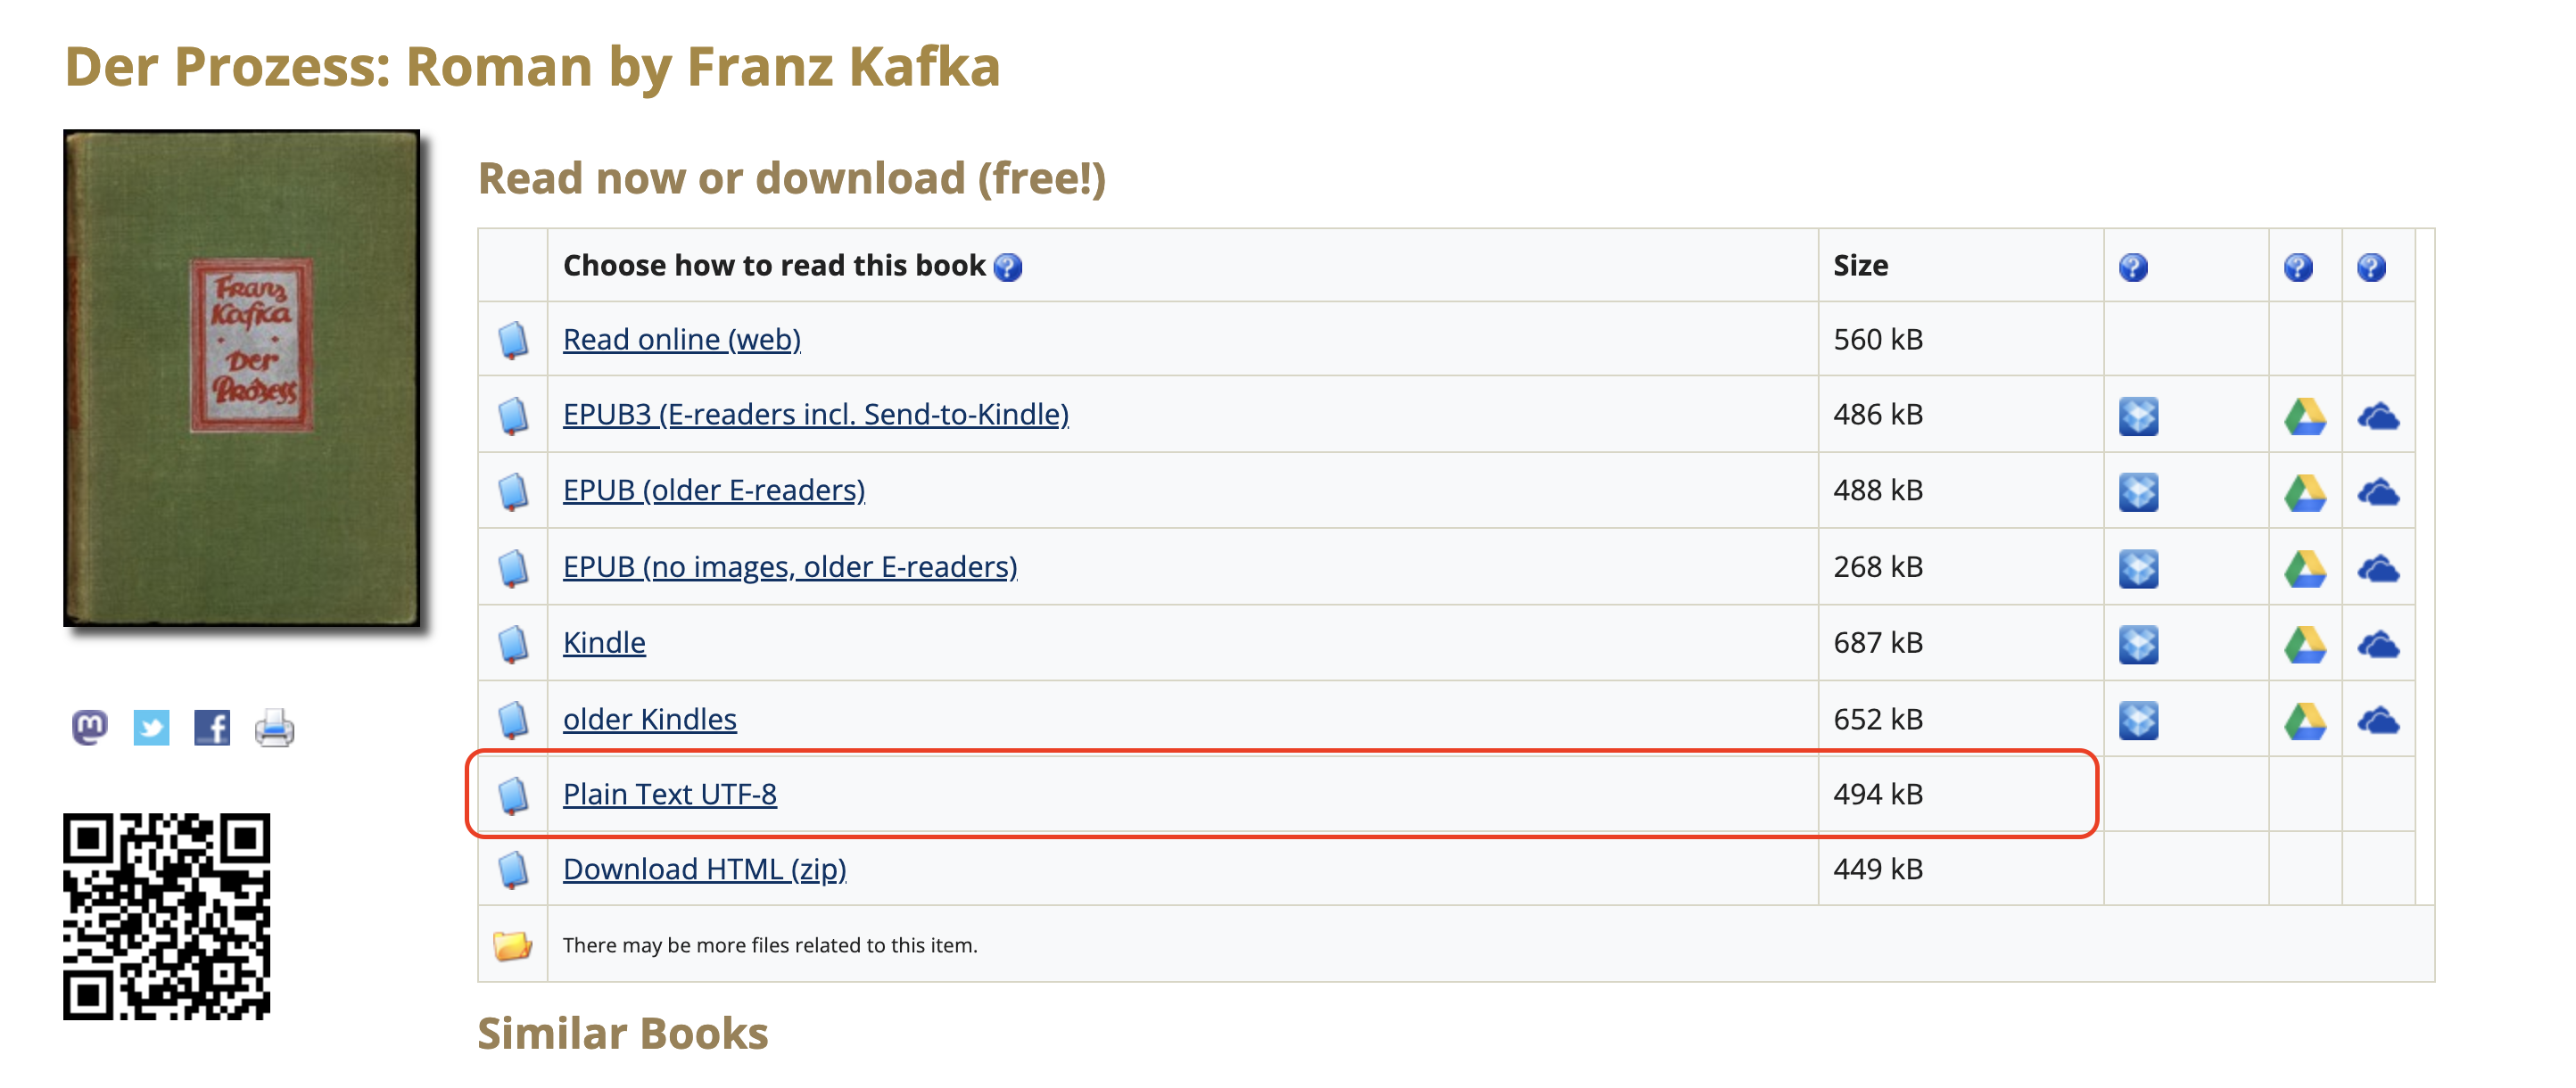

Benutze `re` und String-Verarbeitung in Python, um interessante Dinge über dein Lieblingsbuch (oder ein anderes verfügbares Buch) herauszufinden. Beispiele:

1. Wie lang ist das Buch (in Buchstaben / Wörtern)?
2. Welche Wörter kommen am häufigsten vor? Welche Zeichen kommen am häufigsten vor?
3. Extrahiere alle Datumsangaben aus dem Buchtext
4. Suche nach einem bekannten Zitat aus dem Buch und speichere die Position im Text ab.